<a href="https://colab.research.google.com/github/pragmatizt/coffee_challenges/blob/master/GIS_GDAL_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GIS GDAL Tutorial
This tutorial was found on http://www.acgeospatial.co.uk/colaboratory-notebooks-and-gdal/

In [1]:
# Necessary Imports
import tensorflow as tf
import numpy as np

In [2]:
with tf.Session():
  input1 = tf.constant(1.0, shape=[2, 3])
  input2 = tf.constant(np.reshape(np.arange(1.0, 7.0, dtype=np.float32), (2,3)))
  output = tf.add(input1, input2)
  result = output.eval()

result

array([[2., 3., 4.],
       [5., 6., 7.]], dtype=float32)

Now let's install GDAL on this colab notebook.

In [8]:
!apt update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:8 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
93 packages can be upgraded. Run 'ap

In [9]:
!apt upgrade

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Calculating upgrade... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  cuda-license-10-2
The following packages have been kept back:
  libcudnn7 libcudnn7-dev libnccl-dev libnccl2
The following packages will be upgraded:
  base-files bsdutils e2fsprogs fdisk libblkid1 libcom-err2 libcublas-dev
  libcublas10 libdrm-amdgpu1 libdrm-common libdrm-dev libdrm-intel1
  libdrm-nouveau2 libdrm-radeon1 libdrm2 libegl-mesa0 libegl1-mesa-dev
  libexif-dev libexif12 libext2fs2 libfdisk1 libgbm1 libgcrypt20
  libgl1-mesa-dev libgl1-mesa-dri libglapi-mesa libgles2-mesa-dev libglx-mesa0
  libgnutls30 libllvm9 libmount1 libnvidia-cfg1-440 libnvidia-common-430
  libnvidia-common-440 libnvidia-compute-440 libnvidia-decode-440
  libnvidia-encode-440 libnvidia-fbc1-440 libnv

In [10]:
!apt install gdal-bin python-gdal python3-gdal ## This si the new method.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [0]:
# Step 5
import gdal ## fingers crossed!

# Now let's load some data.

In [12]:
# List the current files - it will return datalab
!ls

sample_data


In [15]:
# clone their github geospatial programming course

! git clone --recursive https://github.com/acgeospatial/Geospatial_Course_Example/

"""Learned something new today.  Didn't know I could clone a github directory from Colab"""

Cloning into 'Geospatial_Course_Example'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.


In [16]:
# check to see if it's installed
!ls # should return 2 folders

Geospatial_Course_Example  sample_data


In [17]:
# access the data
cd Geospatial_Course_Example

/content/Geospatial_Course_Example


In [18]:
# list the files in this folder
!ls # should return 4 files one of which is a .jp2 image

L2A_T30UXB_20170102T111442_TCI_60m_boundry.geojson  Raster_boundary.ipynb
L2A_T30UXB_20170102T111442_TCI_60m.jp2		    README.md


Now just access the data like you would with any other piece of code.  For example if you want to display one band of the image with a 'hot' color map, and a color bar then run the code below.

In [20]:
import matplotlib.pyplot as plt
raster_ds = gdal.Open("L2A_T30UXB_20170102T111442_TCI_60m.jp2", gdal.GA_ReadOnly)
image_gdal = raster_ds.GetRasterBand(1).ReadAsArray()
print(image_gdal.shape) # if you want to see it as a np array

(1830, 1830)


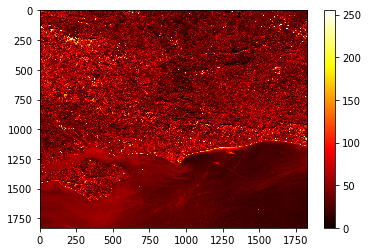

In [21]:
plt.imshow(image_gdal, cmap = "hot", interpolation='nearest', aspect='auto')
plt.colorbar()
plt.show()

In [0]:
# Way cool!